In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset and Preprocessing

In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  str  
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  str  
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  str  
 6   occupation      32561 non-null  str  
 7   relationship    32561 non-null  str  
 8   race            32561 non-null  str  
 9   sex             32561 non-null  str  
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  str  
 14  income          32561 non-null  str  
dtypes: int64(6), str(9)
memory usage: 3.7 MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.replace("?",np.nan,inplace=True)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
df.dropna(inplace =True)

In [9]:
df.shape

(30162, 15)

In [10]:
df['income'] = df['income'].str.strip()
df['income'] = df['income'].str.replace('.', '', regex=False)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [11]:
y = df['income']
X = df.drop('income',axis=1)

In [12]:
X =pd.get_dummies(X,drop_first= True)

In [13]:
X.shape

(30162, 96)

## Task 1 : Decision Trees

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =42)

model = DecisionTreeClassifier(max_depth =3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

The accuracy for decision tree model is:  0.8384351862084208
The precision score is: 0.7727570399476097
The recall score is : 0.514161220043573
The F1 score is : 0.6174777603349032
The classification report for decision tree is :
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      6754
           1       0.77      0.51      0.62      2295

    accuracy                           0.84      9049
   macro avg       0.81      0.73      0.76      9049
weighted avg       0.83      0.84      0.83      9049



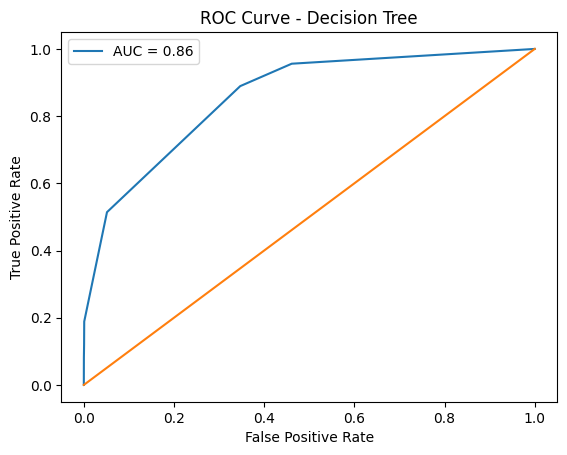

In [34]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

acc_dt = accuracy_score(y_test,y_pred)
classification_report_dt = classification_report(y_test,y_pred)
precision_score_dt = precision_score(y_test,y_pred)
recall_score_dt = recall_score(y_test,y_pred)
f1_score_dt = f1_score(y_test,y_pred)

print("The accuracy for decision tree model is: ",acc_dt)
print("The precision score is:",precision_score_dt)
print("The recall score is :",recall_score_dt)
print("The F1 score is :",f1_score_dt)
print("The classification report for decision tree is :\n",classification_report_dt)

# ROC-AUC Curve 
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_dt = roc_auc_score(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_dt:.2f}")
plt.plot([0, 1], [0, 1])  # diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

#### The model has imbalanced dataset with the class 1 (>50k) having less insatnces , hence the model is able to perdict the class 0 accurately but struggles with the class 1. Hence accuracy here is not a good metrics to watch. Recall value is relatively low tells model misses high income individuals. The ROC-AUC curve has 0.86 area under the curve hence the model is good at differentiating classes.

## Task 2 : Random Forests & Ensembles

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 200,max_depth = None)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)

The accuracy for model is:  0.8457288098132391
The precision score is: 0.726448362720403
The recall score is : 0.628322440087146
The F1 score is : 0.6738317757009346
The classification report for decision tree is :
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6754
           1       0.73      0.63      0.67      2295

    accuracy                           0.85      9049
   macro avg       0.80      0.77      0.79      9049
weighted avg       0.84      0.85      0.84      9049



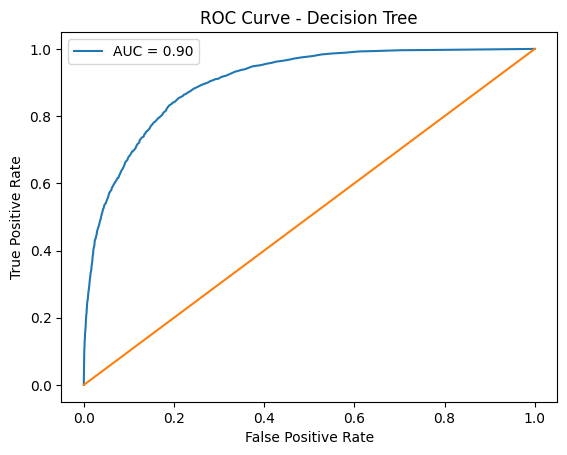

In [37]:
acc_rf = accuracy_score(y_test,y_pred_rf)
classification_report_rf = classification_report(y_test,y_pred_rf)
precision_score_rf = precision_score(y_test,y_pred_rf)
recall_score_rf = recall_score(y_test,y_pred_rf)
f1_score_rf = f1_score(y_test,y_pred_rf)

print("The accuracy for model is: ",acc_rf)
print("The precision score is:",precision_score_rf)
print("The recall score is :",recall_score_rf)
print("The F1 score is :",f1_score_rf)
print("The classification report for decision tree is :\n",classification_report_rf)

# ROC-AUC Curve 
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_rf:.2f}")
plt.plot([0, 1], [0, 1])  # diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

#### The accuracy is slightly improve from decision tree , the precision is bit reduced and recall is increased, showing better detection of minority class.The ROC curve has a greater AUC reflecting better class differentiation than decision tree.

## Task 3: Gradient Boosting - LightGBM

In [104]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [23]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(n_estimators=200,max_depth=6,learning_rate=0.1,random_state=42,verbose =-1)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

The accuracy for model is:  0.8697093601502929
The precision score is: 0.7888198757763976
The recall score is: 0.6640522875816993
The F1 score is: 0.7210787792760823
The classification report for model is :
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6754
           1       0.79      0.66      0.72      2295

    accuracy                           0.87      9049
   macro avg       0.84      0.80      0.82      9049
weighted avg       0.87      0.87      0.87      9049



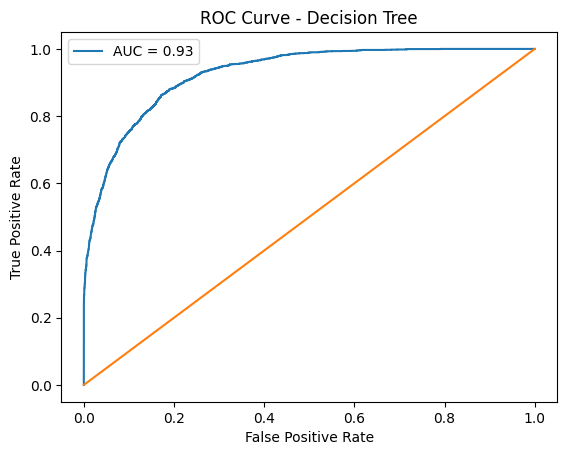

In [38]:
acc_lgb = accuracy_score(y_test,y_pred_lgb)
classification_report_lgb = classification_report(y_test,y_pred_lgb)

precision_score_lgb = precision_score(y_test, y_pred_lgb)
recall_score_lgb = recall_score(y_test, y_pred_lgb)
f1_score_lgb = f1_score(y_test, y_pred_lgb)

print("The accuracy for model is: ",acc_lgb)
print("The precision score is:", precision_score_lgb)
print("The recall score is:", recall_score_lgb)
print("The F1 score is:", f1_score_lgb)
print("The classification report for model is :\n",classification_report_lgb)

# ROC-AUC Curve 
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_prob_lgb)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_lgb:.2f}")
plt.plot([0, 1], [0, 1])  # diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

#### Light GBM shows more improvement than decision tree and random forest, it increase precision and recall, measure both the classes well than before. The AUC has also improved. It confirms that boosting improves both bias and variance through sequential learning.

## Task 4: Hyperparameter Tuning &amp; Interpretability

In [26]:
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here..

In [27]:
print("Best RF Parameters:", rf_random.best_params_)

best_rf = rf_random.best_estimator_

rf_tuned_pred = best_rf.predict(X_test)

Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}


The accuracy for model is:  0.8567797546690242
The precision score is: 0.7839681637293917
The recall score is: 0.6008714596949891
The F1 score is: 0.6803157375431672
The classification report for model is :
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      6754
           1       0.78      0.60      0.68      2295

    accuracy                           0.86      9049
   macro avg       0.83      0.77      0.79      9049
weighted avg       0.85      0.86      0.85      9049



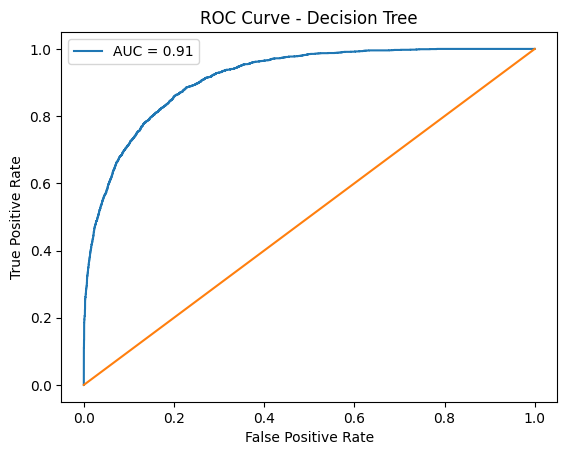

In [39]:
acc_rf_tuned = accuracy_score(y_test,rf_tuned_pred)
classification_report_rf_tuned = classification_report(y_test,rf_tuned_pred)
precision_score_rf_tuned = precision_score(y_test, rf_tuned_pred)
recall_score_rf_tuned = recall_score(y_test, rf_tuned_pred)
f1_score_rf_tuned = f1_score(y_test, rf_tuned_pred)

print("The accuracy for model is: ",acc_rf_tuned)
print("The precision score is:", precision_score_rf_tuned)
print("The recall score is:", recall_score_rf_tuned)
print("The F1 score is:", f1_score_rf_tuned)
print("The classification report for model is :\n",classification_report_rf_tuned)

# ROC-AUC Curve 
y_prob_rf_tuned = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf_tuned)
roc_auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_rf_tuned:.2f}")
plt.plot([0, 1], [0, 1])  # diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

#### The tuned Random Forest model achieved an accuracy of 85.68%, slightly improving overall generalization compared to the base model. Precision for the high-income class remains strong at 0.78, while recall is 0.60, indicating moderate improvement in detecting minority class instances.The ROC-AUC score of 0.91 confirms improved class separation after hyperparameter tuning, showing that tuning helped optimize model complexity and reduce overfitting.

In [29]:
from lightgbm import LGBMClassifier

lgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50, 70]
}

lgb = LGBMClassifier(random_state=42, verbosity=-1)

lgb_random = RandomizedSearchCV(estimator=lgb,param_distributions=lgb_params,n_iter=20,cv=3,scoring='accuracy',random_state=42,n_jobs=-1)

lgb_random.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LGBMClassifie... verbosity=-1)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'learning_rate': [0.01, 0.05, ...], 'max_depth': [-1, 3, ...], 'n_estimators': [100, 200, ...], 'num_leaves': [20, 31, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",20
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... ve

In [30]:
print("Best LGBM Parameters:", lgb_random.best_params_)

best_lgb = lgb_random.best_estimator_

lgb_tuned_pred = best_lgb.predict(X_test)

Best LGBM Parameters: {'num_leaves': 20, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}


The accuracy for model is: 0.8702619073930821
The precision score is: 0.7905650596163816
The recall score is: 0.664488017429194
The F1 score is: 0.7220643939393939
The classification report for model is:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6754
           1       0.79      0.66      0.72      2295

    accuracy                           0.87      9049
   macro avg       0.84      0.80      0.82      9049
weighted avg       0.87      0.87      0.87      9049



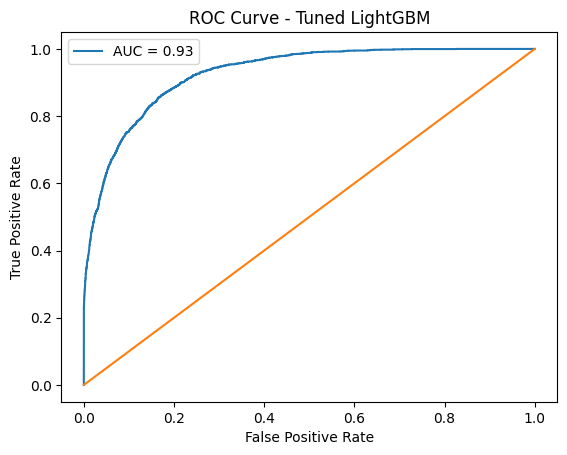

In [40]:
acc_lgb_tuned = accuracy_score(y_test, lgb_tuned_pred)

# Store precision, recall, f1
precision_score_lgb_tuned = precision_score(y_test, lgb_tuned_pred)
recall_score_lgb_tuned = recall_score(y_test, lgb_tuned_pred)
f1_score_lgb_tuned = f1_score(y_test, lgb_tuned_pred)

# Classification report
classification_report_lgb_tuned = classification_report(y_test, lgb_tuned_pred)

# Print
print("The accuracy for model is:", acc_lgb_tuned)
print("The precision score is:", precision_score_lgb_tuned)
print("The recall score is:", recall_score_lgb_tuned)
print("The F1 score is:", f1_score_lgb_tuned)
print("The classification report for model is:\n", classification_report_lgb_tuned)

# ROC-AUC
y_prob_lgb_tuned = best_lgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lgb_tuned)
roc_auc_lgb_tuned = roc_auc_score(y_test, y_prob_lgb_tuned)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_lgb_tuned:.2f}")
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned LightGBM")
plt.legend()
plt.show()

#### The hyperparameter tuned LGB model has overall acuracy 87%, with a slight increase in precision and recall . However still due to imbalanced dataset the recall stills remains less dentoing higher false negative. The AUC is same as of the base model, denoting strong class segeration. 

### Comparision of all models

In [41]:
comparison_final = pd.DataFrame({
    'Model': [
        'Decision Tree',
        'Random Forest',
        'LightGBM',
        'Random Forest Tuned',
        'LightGBM Tuned'
    ],
    'Accuracy': [
        acc_dt,
        acc_rf,
        acc_lgb,
        acc_rf_tuned,
        acc_lgb_tuned
    ],
    'Precision': [
        precision_score_dt,
        precision_score_rf,
        precision_score_lgb,
        precision_score_rf_tuned,
        precision_score_lgb_tuned
    ],
    'Recall': [
        recall_score_dt,
        recall_score_rf,
        recall_score_lgb,
        recall_score_rf_tuned,
        recall_score_lgb_tuned
    ],
    'F1 Score': [
        f1_score_dt,
        f1_score_rf,
        f1_score_lgb,
        f1_score_rf_tuned,
        f1_score_lgb_tuned
    ],
    'ROC-AUC': [
        roc_auc_dt,
        roc_auc_rf,
        roc_auc_lgb,
        roc_auc_rf_tuned,
        roc_auc_lgb_tuned
    ]
})
comparison_final = comparison_final.round(3)
print(comparison_final)

                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0        Decision Tree     0.838      0.773   0.514     0.617    0.858
1        Random Forest     0.846      0.726   0.628     0.674    0.903
2             LightGBM     0.870      0.789   0.664     0.721    0.927
3  Random Forest Tuned     0.857      0.784   0.601     0.680    0.915
4       LightGBM Tuned     0.870      0.791   0.664     0.722    0.927


#### The results show a clear improvement as we move from a single Decision Tree to ensemble methods. The Decision Tree performs reasonably but struggles with minority class recall, indicating overfitting and imbalance sensitivity. Random Forest improves stability and recall through bagging, increasing overall performance and AUC.LightGBM performs best, achieving the highest accuracy, F1-score, and ROC-AUC, showing strong class separation and better minority detection due to boosting’s sequential learning. Overall, boosting provides the most balanced and reliable model for this dataset.